<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Исследование-распределения,-тренда-и-сезонности" data-toc-modified-id="Исследование-распределения,-тренда-и-сезонности-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование распределения, тренда и сезонности</a></span></li><li><span><a href="#Создадим-дополнительные-признаки" data-toc-modified-id="Создадим-дополнительные-признаки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создадим дополнительные признаки</a></span></li><li><span><a href="#Проведем-дополнительный-исследовательский-анализ-данных" data-toc-modified-id="Проведем-дополнительный-исследовательский-анализ-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проведем дополнительный исследовательский анализ данных</a></span></li><li><span><a href="#Подготовим-признаки-для-обучения-моделей" data-toc-modified-id="Подготовим-признаки-для-обучения-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовим признаки для обучения моделей</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создадим-модели-и-подберем-гиперпараметры" data-toc-modified-id="Создадим-модели-и-подберем-гиперпараметры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создадим модели и подберем гиперпараметры</a></span><ul class="toc-item"><li><span><a href="#Создадим-модель-случайного-леса" data-toc-modified-id="Создадим-модель-случайного-леса-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Создадим модель случайного леса</a></span></li><li><span><a href="#Создадим-модель-CatBoost" data-toc-modified-id="Создадим-модель-CatBoost-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Создадим модель CatBoost</a></span></li><li><span><a href="#Создадим-модель-LightGBM" data-toc-modified-id="Создадим-модель-LightGBM-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Создадим модель LightGBM</a></span></li></ul></li><li><span><a href="#Проверим-качество-работы-моделей-на-кроссвалидации" data-toc-modified-id="Проверим-качество-работы-моделей-на-кроссвалидации-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверим качество работы моделей на кроссвалидации</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Постановка задачи

В нашем распоряжении данные о количестве заказов такси за период с 01.03.2018 по 31.08.2018.
Необходимо построить модель обучения для эффективного определения для прогнозирования заказов такси на следующий час.

Необходимо рассмотреть работу нескольких моделей машиного обучения, выбрать наилучшую по показателю RMSE.
Целевая задача, чтобы метрика RMSE была не более 48.

## Подготовка

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display
import numpy as np


import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, TimeSeriesSplit


Прочитаем данные, сделаем столбец с датой индексом. Отсортируем индекс по возрастанию

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

Проверим, что индексы упорядочены

In [3]:
data.index.is_monotonic

True

Выведем первые 5 строк датасета, чтобы убедиться в корректности прочитанных данных

In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


В датасете предтставлены целочисленное количество заказов такси за период с 01.03.2018 по 31.08.2018 года

## Анализ

### Исследование распределения, тренда и сезонности

Посмотрим распределение количества заказов на всем периоде

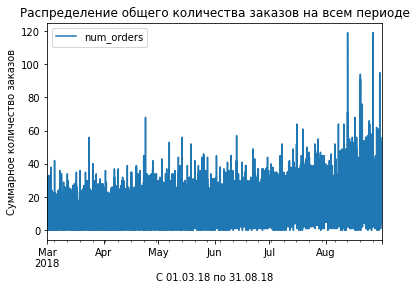

In [6]:
data.plot()
plt.title('Распределение общего количества заказов на всем периоде')
plt.xlabel('С 01.03.18 по 31.08.18')
plt.ylabel('Суммарное количество заказов')
plt.show()

Проведем ремлирование данных по 1 дню, чтобы посмотреть тренд и сезонность

In [7]:
decomposed = seasonal_decompose(data.resample('1D').sum()) 

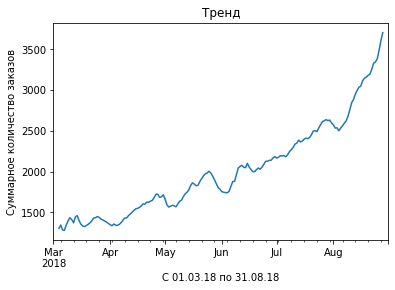

In [8]:
decomposed.trend.plot()
plt.title('Тренд')
plt.xlabel('С 01.03.18 по 31.08.18')
plt.ylabel('Суммарное количество заказов')
plt.show()

На графике виден рост количества заказов такси, при этом в начале каждого месяца видно снижение количества заказов

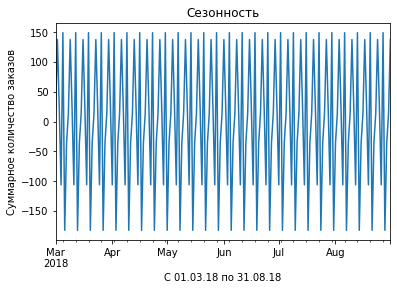

In [9]:
decomposed.seasonal.plot()
plt.title('Сезонность')
plt.xlabel('С 01.03.18 по 31.08.18')
plt.ylabel('Суммарное количество заказов')
plt.show()

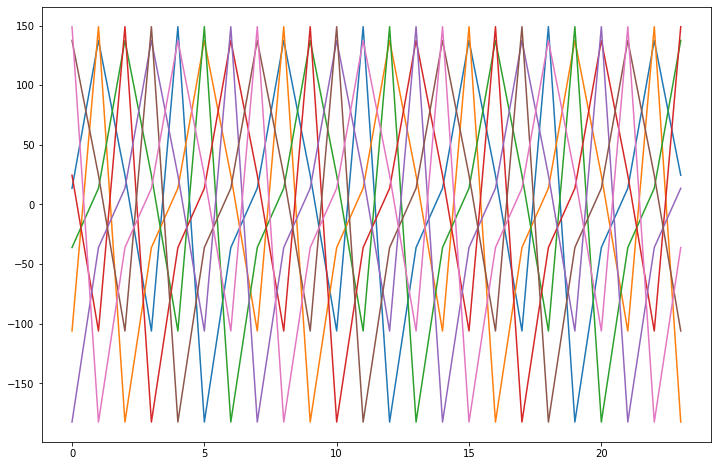

In [10]:
fig = plt.figure(figsize=(12, 8))
counter = 24
while counter < decomposed.seasonal.shape[0]:
    plt.plot(decomposed.seasonal[counter-24:counter].reset_index(drop=True), figure=fig)
    counter += 24

### Создадим дополнительные признаки

Проведем ресемлирование данных по 1 часу

In [11]:
data = data.resample('1H').sum()

Создадим функцию, которая дополнительно создаст дополнительные признаки:
- месяц;
- день;
- день недели;
- час, чтобы модель получала в какой час было это количество заказов, т.к. целевая задача предсказать на следующий час;
- размер отставания;
- размер окна сдвига.

In [12]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [13]:
make_features(data, 10, 10)

In [14]:
data.head(20)

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean
datetime,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,3,1,3,5,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,3,1,3,6,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,NaN,NaN,NaN


### Проведем дополнительный исследовательский анализ данных

Рассмотрим распределение количества заказов по дням недели

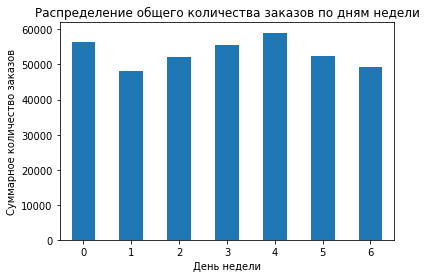

In [15]:
data.groupby(by='dayofweek')['num_orders'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Распределение общего количества заказов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Суммарное количество заказов')
plt.show()

Вывод:  
Видно, что наиболее часто такси используется в понедельник и пятницу.  
Наименее частно во вторник и воскресенье.  
После вторника идет плавный рост количества заказов к пятнице и потом спад

Рассмотрим распреледение количества заказов по дня месяца

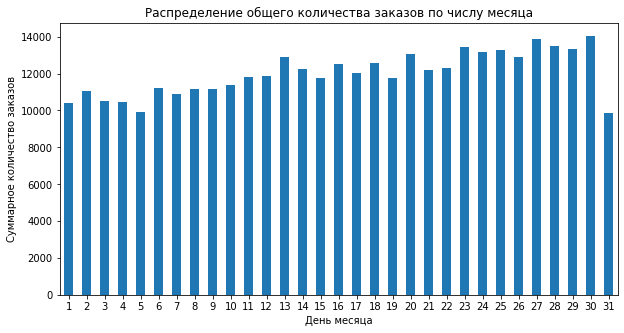

In [16]:
figure(figsize=(10,5))
data.groupby(by='day')['num_orders'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Распределение общего количества заказов по числу месяца')
plt.xlabel('День месяца')
plt.ylabel('Суммарное количество заказов')
plt.show()

Вывод:  
Видно, что в течении месяца идет плавный рост количества заказов такси, в начале месяца он ниже.  
В начале каждой недели идет спад и плавный рост к концу недели.
31 число не показатель, т.к. в апреле и июне нет 31 числа, поэтому однозначно нельзя сделать вывод, что 31 числа наименьшее количество заказов

Рассмотрим распреледение количества заказов по месяцам

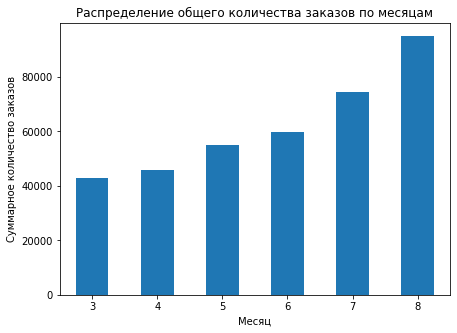

In [17]:
figure(figsize=(7,5))
data.groupby(by='month')['num_orders'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Распределение общего количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарное количество заказов')
plt.show()

Вывод:  
Видно, что в течении рассматриваемого периода с марта по август идет реский рост количество заказов в летние месяцы  

Удалим из датасета данные, в которых оставания получились нулевыми

In [18]:
data.dropna(inplace=True)

### Подготовим признаки для обучения моделей

Разделим датасет на признаки на которых будет обучаться модель и целевой признак.  

In [19]:
features = data.drop(['num_orders'], axis=1)

In [20]:
target = data.num_orders

Разделим выборки на тренировочную и тестовую в соотношении 90% на 10%

In [21]:
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.1)

Проверим корректность разбиения

In [22]:
features_train.shape, features_test.shape

((3965, 15), (441, 15))

## Обучение

Создадим переменные с параметрами моделей, которые будем передавать в GridSearch для подбора наилучих гиперпараметров

In [23]:
# для случайного леса
params_rf = { 'n_estimators': [10, 20, 30, 40, 50],
              'max_depth': [5,10,15]}

In [24]:
# для CatBoost
params_cat = {'n_estimators':[100, 300],
              'max_depth': [10,15],
             'learning_rate': [0.03, 0.1]}

In [25]:
# для LightGBM
params_lgbm = {'n_estimators':[100, 300],
              'max_depth' : [5,10,15],
              'learning_rate':[0.01, 0.1]}

### Создадим модели и подберем гиперпараметры

#### Создадим модель случайного леса

In [26]:
model_rf = RandomForestRegressor(random_state=12345)
model_rf

RandomForestRegressor(random_state=12345)

Запустим GridSearchCV для подбора наилучших гиперпараметров для модели случайного леса.  
Для кросс-валидации будем использовать TimeSeriesSplit, т.к. имеем дело с временным рядом. Это позволит получить в каждом сплите тестовые индексы позже по времени, чем обучающие.

In [27]:
tscv = TimeSeriesSplit(n_splits=5)

In [28]:
grid_rf = GridSearchCV(estimator = model_rf, param_grid = params_rf, cv = tscv, n_jobs=-1)

In [29]:
%%time
grid_rf.fit(features_train, target_train)

CPU times: user 22.6 s, sys: 87.7 ms, total: 22.7 s
Wall time: 22.9 s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=12345), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [30]:
grid_rf.best_params_

{'max_depth': 15, 'n_estimators': 50}

Сохраним модель Случайного леса с лучшими гиперпараметрами

In [31]:
model_rf = grid_rf.best_estimator_
model_rf

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=12345)

#### Создадим модель CatBoost

In [32]:
model_cat = CatBoostRegressor(loss_function='RMSE', verbose=50)
model_cat

In [33]:
grid_cat = GridSearchCV(estimator = model_cat, param_grid = params_cat, cv = tscv, n_jobs=-1)

In [34]:
%%time
grid_cat.fit(features_train, target_train)

0:	learn: 29.1885654	total: 65.6ms	remaining: 6.5s
50:	learn: 18.0235959	total: 836ms	remaining: 803ms
99:	learn: 13.7441804	total: 1.67s	remaining: 0us
0:	learn: 29.8873465	total: 22.5ms	remaining: 2.23s
50:	learn: 19.5693589	total: 944ms	remaining: 907ms
99:	learn: 15.6900994	total: 1.89s	remaining: 0us
0:	learn: 31.5172872	total: 24.7ms	remaining: 2.44s
50:	learn: 20.6409007	total: 1.11s	remaining: 1.07s
99:	learn: 16.8422028	total: 2.17s	remaining: 0us
0:	learn: 32.9054605	total: 25.6ms	remaining: 2.54s
50:	learn: 21.7539674	total: 1.13s	remaining: 1.09s
99:	learn: 18.2043853	total: 2.19s	remaining: 0us
0:	learn: 34.3010445	total: 24.2ms	remaining: 2.4s
50:	learn: 22.5549322	total: 1.21s	remaining: 1.16s
99:	learn: 19.0540669	total: 2.38s	remaining: 0us
0:	learn: 29.1885654	total: 19.6ms	remaining: 5.87s
50:	learn: 18.0235959	total: 803ms	remaining: 3.92s
100:	learn: 13.6837768	total: 1.66s	remaining: 3.27s
150:	learn: 11.0712101	total: 2.46s	remaining: 2.42s
200:	learn: 9.2679108	

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f1616683d60>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.1], 'max_depth': [10, 15],
                         'n_estimators': [100, 300]})

54min 15s

In [35]:
grid_cat.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

Сохраним модель CatBoost с лучшими гиперпараметрами

In [36]:
model_cat = grid_cat.best_estimator_

#### Создадим модель LightGBM

In [37]:
model_lgbm = LGBMRegressor()

In [38]:
grid_lgbm = GridSearchCV(estimator = model_lgbm, param_grid = params_lgbm, cv = tscv, n_jobs=-1)

In [39]:
%%time
grid_lgbm.fit(features_train, target_train)

CPU times: user 10min 54s, sys: 0 ns, total: 10min 54s
Wall time: 10min 59s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10, 15],
                         'n_estimators': [100, 300]})

In [40]:
grid_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Сохраним модель LightGBM с лучшими гиперпараметрами

In [41]:
model_lgbm = grid_lgbm.best_estimator_
model_lgbm

LGBMRegressor(max_depth=5)

### Проверим качество работы моделей на кроссвалидации

Создадим словарь, в котором перечислим полученные модели

In [42]:
dict = {'RF' : model_rf,
        'CatBoost' : model_cat,
        'LightGBM' : model_lgbm
       }

Создадим таблицу для сохранения дальнейших резузьтатов

In [43]:
results = pd.DataFrame(index = dict.keys(), columns=['model', 'RMSE', 'std', 'time_fit'])
results

,model,RMSE,std,time_fit
RF,NaN,NaN,NaN,NaN
CatBoost,NaN,NaN,NaN,NaN
LightGBM,NaN,NaN,NaN,NaN


Создадим цикл, в котором прогоним последовательно модели на кроссвалидации и сохраним метрику RMSE и время предсказания в таблицу

In [44]:
for index, model in dict.items():
    results.loc[index]['model'] = index
    print(model)
    time_start = time.time() # фиксируем время начала обучения
    cv = cross_val_score(model, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error')
    results.loc[index]['time_fit'] = round((time.time() - time_start),2)
    results.loc[index]['RMSE'] = round(abs(cv.mean()),3)
    results.loc[index]['std'] = round(abs(cv.std()),3)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=12345)
0:	learn: 28.2980973	total: 16.3ms	remaining: 4.87s
50:	learn: 10.1280424	total: 818ms	remaining: 3.99s
100:	learn: 6.0132058	total: 1.59s	remaining: 3.14s
150:	learn: 4.0459660	total: 2.37s	remaining: 2.34s
200:	learn: 2.8891318	total: 3.16s	remaining: 1.56s
250:	learn: 1.9306231	total: 3.94s	remaining: 769ms
299:	learn: 1.2990577	total: 4.7s	remaining: 0us
0:	learn: 28.9851334	total: 19.5ms	remaining: 5.82s
50:	learn: 12.5181577	total: 919ms	remaining: 4.49s
100:	learn: 8.3576757	total: 1.84s	remaining: 3.64s
150:	learn: 6.0757274	total: 2.85s	remaining: 2.82s
200:	learn: 4.3635413	total: 3.76s	remaining: 1.85s
250:	learn: 3.1680670	total: 4.64s	remaining: 906ms
299:	learn: 2.2478206	total: 5.55s	remaining: 0us
0:	learn: 30.5647426	total: 20.2ms	remaining: 6.04s
50:	learn: 14.1422627	total: 1s	remaining: 4.89s
100:	learn: 10.1496189	total: 2.01s	remaining: 3.97s
150:	learn: 7.4270062	total: 2.99s	remaining: 2.95

In [45]:
results.sort_values(by='RMSE', ascending=True, inplace=True)

Построим графим полученных результатов

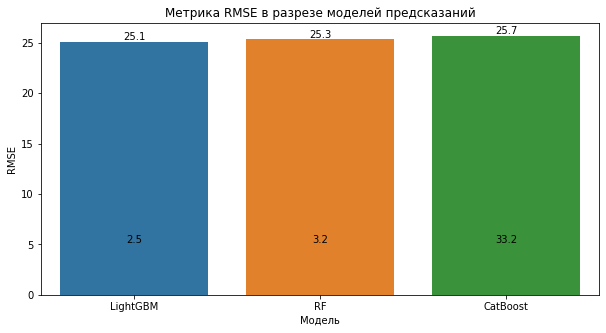

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=results, x='model', y='RMSE')
for i, rmse in enumerate(results.RMSE):
    ax.text(i,rmse,round(rmse, 1),  verticalalignment='bottom', horizontalalignment='center')
for i, time in enumerate(results.time_fit):
    ax.text(i,5,round(time, 1),  verticalalignment='bottom', horizontalalignment='center')    
plt.title('Метрика RMSE в разрезе моделей предсказаний')
plt.xlabel('Модель')
plt.show()

Вывод: из графика видно, что наилучший показатель метрики **RMSE** на кроссвалидации показала модель **LightGBM.**  

## Тестирование

Проведем итоговое тестирование **LightGBM**, которая показала наилучшие данные на кроссвалидации

In [48]:
model_lgbm.fit(features_train,target_train)

LGBMRegressor(max_depth=5)

In [49]:
predict_lgbm = model_lgbm.predict(features_test)
predict_lgbm

array([100.46396499, 129.7341783 , 144.69908343, 108.04233347,
       108.53696258, 106.26815042, 109.54414704, 148.80436955,
       140.16847748, 199.94324443, 158.13914467, 159.07690497,
       176.5161953 , 131.5713789 ,  71.51068577,  50.22584959,
        45.22535049,  92.00584594, 104.401735  , 130.73335116,
       127.39242513,  93.5093899 , 102.34131793,  90.6654019 ,
       110.24547117, 145.75955893, 136.78342281, 100.51202794,
        99.89836649, 111.04528323, 129.7943588 , 116.94545007,
       126.48054733, 173.36209685, 185.6775393 , 182.62875647,
       138.42918295, 142.26373144,  77.88713321,  68.19681779,
        51.50532005,  84.05842751, 130.7075047 , 128.70005309,
       110.41081249, 109.47046109, 105.25014759,  90.36787659,
       102.95177469, 167.36694377, 153.41976839,  89.66156237,
        99.93649473, 111.64930041, 122.27591305, 126.5999302 ,
       131.18218605, 198.28960219, 156.63837075, 206.90048558,
       192.53146361, 146.76720666,  96.30102379,  80.50

Рассчитаем целевую метрику **RMSE**

In [50]:
rsme_lgbm = mean_squared_error(target_test, predict_lgbm) ** 0.5
f'показатель RMSE на тестовых данных {rsme_lgbm}'

'показатель RMSE на тестовых данных 42.79366602909476'

## Вывод

В нашем распоряжении были данные о количестве заказов такси за период с **01.03.2018 по 31.08.2018.** Необходимо было построить модель обучения для эффективного определения для прогнозирования заказов такси на следующий час.

В ходе выполнения работы мы проанализировали данные, выявили закономерности в количестве заказов такси в зависимости от дня недели, дня месяца и общий рост количества заказов в летний период.

Также в данных были созданы дополнительные признаки:  
- месяц;  
- день;  
- день недели;  
- час, чтобы модель получала в какой час было это количество заказов, т.к. целевая задача предсказать на следующий час;  
- размер отставания;  
- размер окна сдвига.  
чтобы модель лучше обучилась.

В результате выполнения работы мы рассмотрели работу нескольких моделей машиного обучения:
- Случайный лес;
- LightGBM;
- CatBoost.

Для каждой модели был подобран оптимальный набор гиперпараметров алгоритмом **GridSearchCV**.
  
  Для кроссвалидации использовал **TimeSeriesSplit** т.к. фолды не должны перемешиватся.  
  
При проверке на кроссвалидации наилучший результат по показателю **RMSE** показала модель **LightGBM**. 

На тестовых данных модель **LightGBM** показала **RMSE** = 42.79.  
Условием задачи было получить метрику **RMSE** не более 48.  
**Целевая задача выполнена.**